# Exploratory Data Analysis for online sales 

### data fetching

In [1]:
import pandas as pd
retail_df = pd.read_excel(io='online_retail_II.xlsx')

In [2]:
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
# Create a copy of the original data to avoid modifying the fetched data directly.
retail_sp = retail_df.copy()

Since the analysis focuses on customers, check for missing values in Customer ID

In [4]:
retail_sp['Customer ID'].isna().sum()

107927

In [5]:
retail_sp[retail_sp['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [6]:
# Remove rows where Customer ID is NaN, Description is NaN, and Price is 0, as they are considered incorrectly recorded data.
retail_sp = retail_sp[~((retail_sp['Customer ID'].isna()) & (retail_sp['Description'].isna()) & (retail_sp['Price']==0))]

# Assign -1 to Customer ID for other cases, considering them as guest purchases or canceled transactions.
retail_sp['Customer ID'] = retail_sp['Customer ID'].fillna(-1)

Check the data types of all columns

In [7]:
retail_sp.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [8]:
# Convert 'Customer ID' to integer type
retail_sp['Customer ID'] = retail_sp['Customer ID'].astype(int)

Check dataset

In [9]:
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


### Purchase trend analysis

In [10]:
# Extract necessary columns for purchase trend analysis
purchase_trend_df = retail_sp[['Customer ID', 'Invoice', 'Description', 'Quantity', 'Price', 'Country', 'InvoiceDate', ]].copy()

In [11]:
# Separate Date and Time columns
import datetime as dt
purchase_trend_df['InvoiceTime'] = purchase_trend_df['InvoiceDate'].dt.time
purchase_trend_df['InvoiceDate'] = purchase_trend_df['InvoiceDate'].dt.date

In [12]:
# Create new column: sales amount = quantity * price
purchase_trend_df.loc[:, 'SalesAmount'] = purchase_trend_df['Quantity'] * purchase_trend_df['Price']

In [13]:
purchase_trend_df

,Customer ID,Invoice,Description,Quantity,Price,Country,InvoiceDate,InvoiceTime,SalesAmount
0,13085,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009-12-01,07:45:00,83.40
1,13085,489434,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01,07:45:00,81.00
2,13085,489434,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01,07:45:00,81.00
3,13085,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009-12-01,07:45:00,100.80
4,13085,489434,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009-12-01,07:45:00,30.00
...,...,...,...,...,...,...,...,...,...
525456,17530,538171,FELTCRAFT DOLL ROSIE,2,2.95,United Kingdom,2010-12-09,20:01:00,5.90
525457,17530,538171,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,United Kingdom,2010-12-09,20:01:00,3.75
525458,17530,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,United Kingdom,2010-12-09,20:01:00,3.75
525459,17530,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,United Kingdom,2010-12-09,20:01:00,7.50


##### Daily purchase trend

In [14]:
daily_purchase_trend = purchase_trend_df.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Price': 'mean', 'SalesAmount': 'sum', 'Invoice': 'count'})
daily_purchase_trend = daily_purchase_trend.rename(columns={'Invoice': 'Transactions'})
daily_purchase_trend

,Quantity,Price,SalesAmount,Transactions
InvoiceDate,,,,
2009-12-01,23886,4.487745,53173.03,3220
2009-12-02,30923,4.097757,62763.59,3273
2009-12-03,44569,4.438961,68093.05,2994
2009-12-04,21219,3.791499,40346.40,2555
2009-12-05,5119,3.608150,9803.05,400
...,...,...,...,...
2010-12-05,16395,2.896576,31383.95,2725
2010-12-06,21398,4.570522,53860.18,3868
2010-12-07,25261,28.816274,45059.05,2955


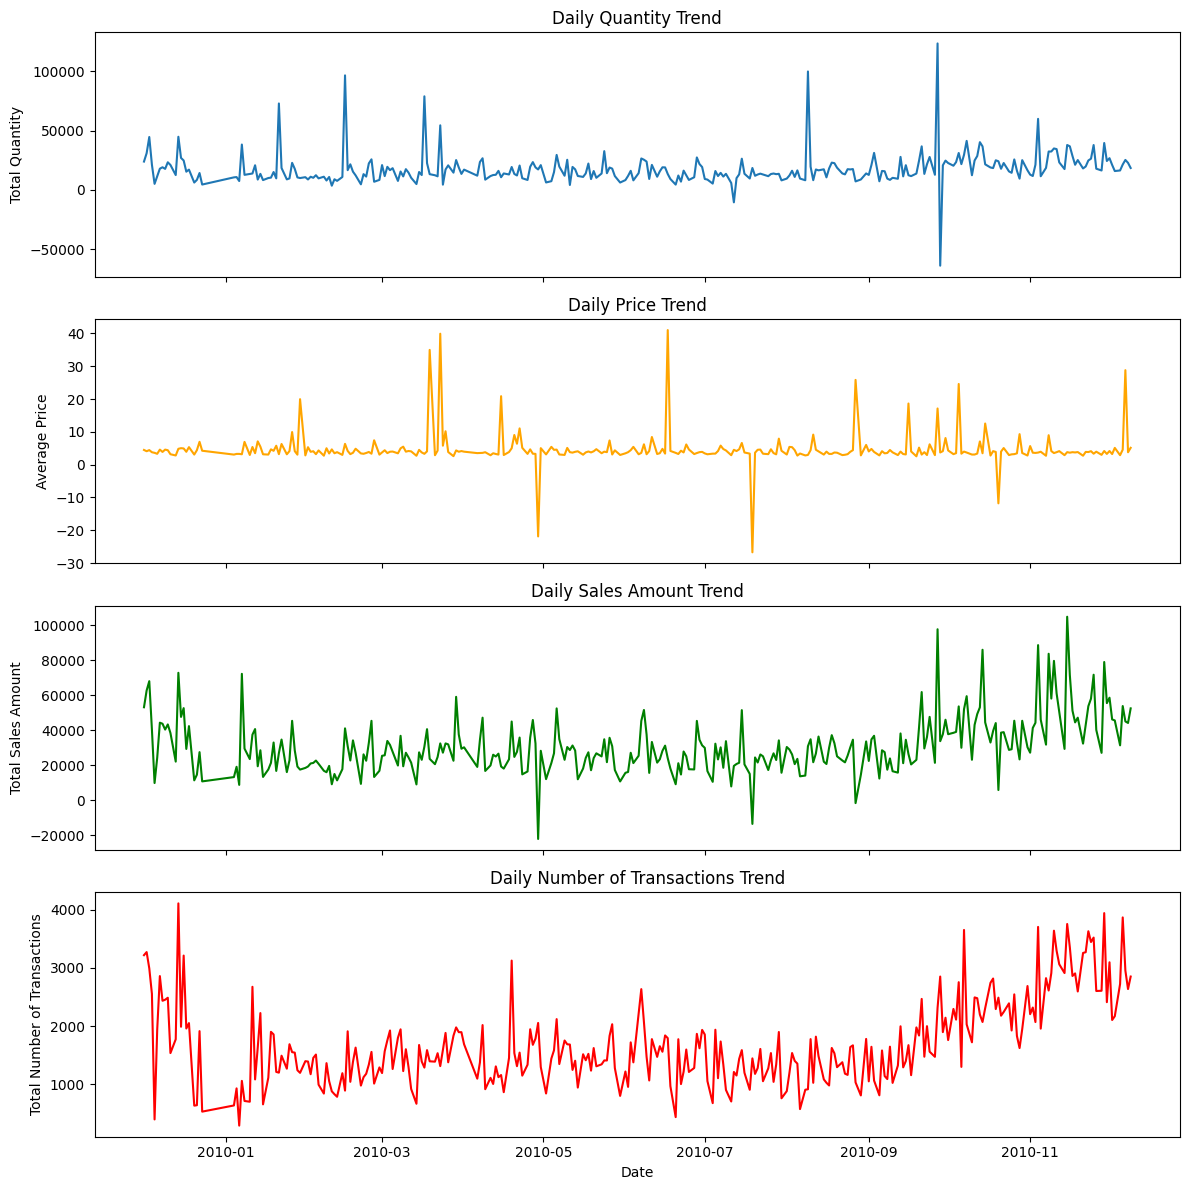

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

axes[0].plot(daily_purchase_trend.index, daily_purchase_trend['Quantity'])
axes[0].set_ylabel('Total Quantity')
axes[0].set_title('Daily Quantity Trend')

axes[1].plot(daily_purchase_trend.index, daily_purchase_trend['Price'], color='orange')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Daily Price Trend')

axes[2].plot(daily_purchase_trend.index, daily_purchase_trend['SalesAmount'], color='green')
axes[2].set_ylabel('Total Sales Amount')
axes[2].set_title('Daily Sales Amount Trend')

axes[3].plot(daily_purchase_trend.index, daily_purchase_trend['Transactions'], color='red')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Total Number of Transactions')
axes[3].set_title('Daily Number of Transactions Trend')

plt.tight_layout()
plt.show()

* Except for certain points that appear to be outliers, **quantity** and **price** seem to consistently maintain a certain level. -> Conduct additional analysis to identify the cause of the outliers.
* On the other hand, **sales amount** and **number of transactions** continue to fluctuate while appearing to follow a certain trend. -> Decompose the data into trend, seasonality, and residual components.

In [16]:
# Conduct additional analysis to identify the cause of the outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.index

outliers_quantity_date = detect_outliers_iqr(daily_purchase_trend, "Quantity")
outliers_price_date = detect_outliers_iqr(daily_purchase_trend, "Price")

outliers = purchase_trend_df[(purchase_trend_df['InvoiceDate'].isin(outliers_quantity_date)) | (purchase_trend_df['InvoiceDate'].isin(outliers_price_date))]
outliers

,Customer ID,Invoice,Description,Quantity,Price,Country,InvoiceDate,InvoiceTime,SalesAmount
6500,12779,489895,PARTY CONE CHRISTMAS DECORATION,12,0.85,Poland,2009-12-03,07:25:00,10.20
6501,12779,489895,SET OF 3 CASES WOODLAND DESIGN,2,5.95,Poland,2009-12-03,07:25:00,11.90
6502,12779,489895,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,Poland,2009-12-03,07:25:00,30.00
6503,12779,489895,CERAMIC CAKE DESIGN SPOTTED MUG,24,1.49,Poland,2009-12-03,07:25:00,35.76
6504,12779,489895,FAIRY CAKE CERAMIC BUTTER DISH,6,2.95,Poland,2009-12-03,07:25:00,17.70
...,...,...,...,...,...,...,...,...,...
519918,-1,537666,FRYING PAN UNION FLAG,3,8.47,United Kingdom,2010-12-07,18:36:00,25.41
519919,-1,537666,FOUR HOOK WHITE LOVEBIRDS,2,4.21,United Kingdom,2010-12-07,18:36:00,8.42
519920,-1,537666,LOVEBIRD HANGING DECORATION WHITE,3,1.66,United Kingdom,2010-12-07,18:36:00,4.98
519921,-1,537666,HANGING HEART MIRROR DECORATION,3,1.28,United Kingdom,2010-12-07,18:36:00,3.84


In [17]:
outliers_date_group = outliers.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Price': 'mean', 'Invoice': 'count'})
outliers_date_group

,Quantity,Price,Invoice
InvoiceDate,,,
2009-12-03,44569,4.438961,2994
2009-12-14,44780,4.834991,4109
2009-12-22,14240,6.967693,1916
2010-01-07,38230,3.176234,1062
2010-01-08,12708,6.945509,717
2010-01-13,8739,7.103987,1633
2010-01-21,72824,3.204156,1203
2010-01-26,22799,9.942849,1555
2010-01-29,10007,19.972368,1200


Extracted only the dates that were considered outliers, but could not identify specific reasons such as a sale period, a holiday, or a significant increase or decrease in purchase.

C:\Users\ShinJiyoon\AppData\Local\Temp\ipykernel_29368\2631478263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Membership'] = outliers['Customer ID'].apply(lambda x: 'Non-Member' if x==-1 else 'Member')


Text(0.5, 0.98, 'Outlier Analysis of Purchase Quantity and Price by Membership Status')

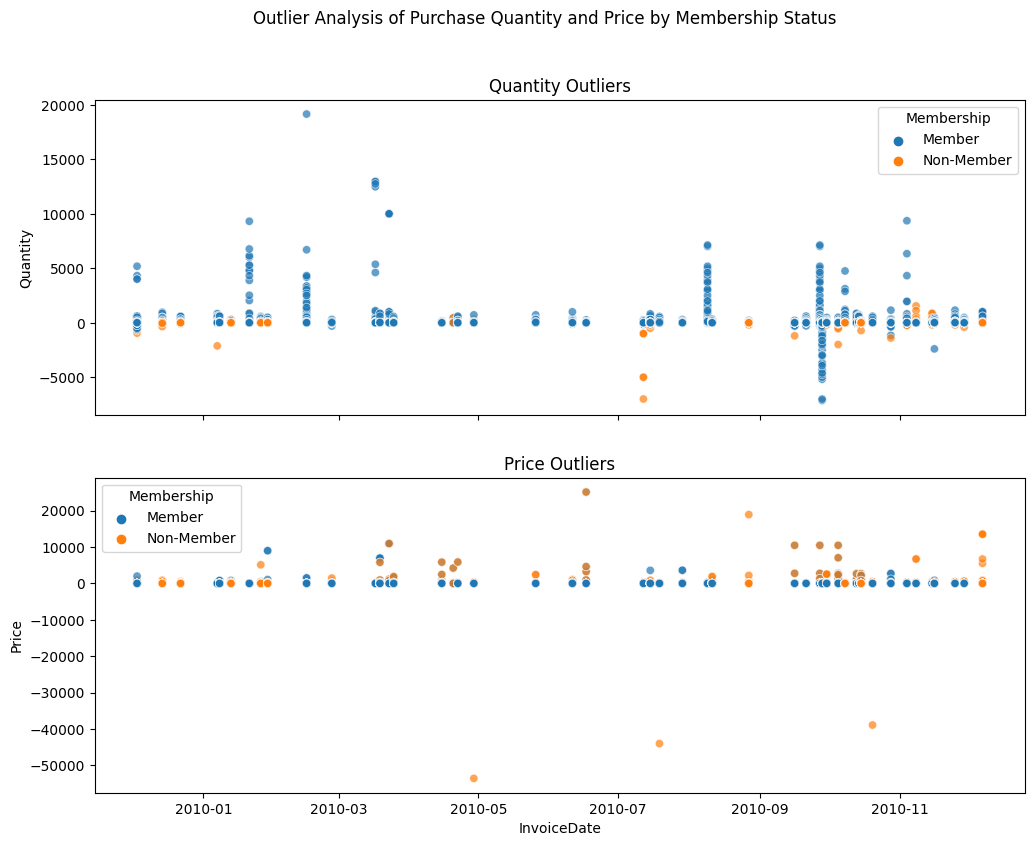

In [18]:
import seaborn as sns

outliers['Membership'] = outliers['Customer ID'].apply(lambda x: 'Non-Member' if x==-1 else 'Member')

fig, axes = plt.subplots(2, 1, figsize=(12, 9), sharex=True)
sns.scatterplot(ax=axes[0], x=outliers['InvoiceDate'], y=outliers['Quantity'], hue=outliers['Membership'], alpha=0.7)
axes[0].set_title("Quantity Outliers")
sns.scatterplot(ax=axes[1], x=outliers['InvoiceDate'], y=outliers['Price'], hue=outliers['Membership'], alpha=0.7)
axes[1].set_title("Price Outliers")

fig.suptitle("Outlier Analysis of Purchase Quantity and Price by Membership Status")

* Visualized the outliers in quantity and price using the time series graph, distinguishing between members and non-members.
    * Fluctuations in quantity were greater among members, while fluctuations in price were more pronounced among non-members. Therefore, it is likely that outliers in quantity resulted from members making bulk purchases or refunds at specific points of time, whereas outliers in price may have been caused by non-members purchasing or refunding expensive items at certain times.

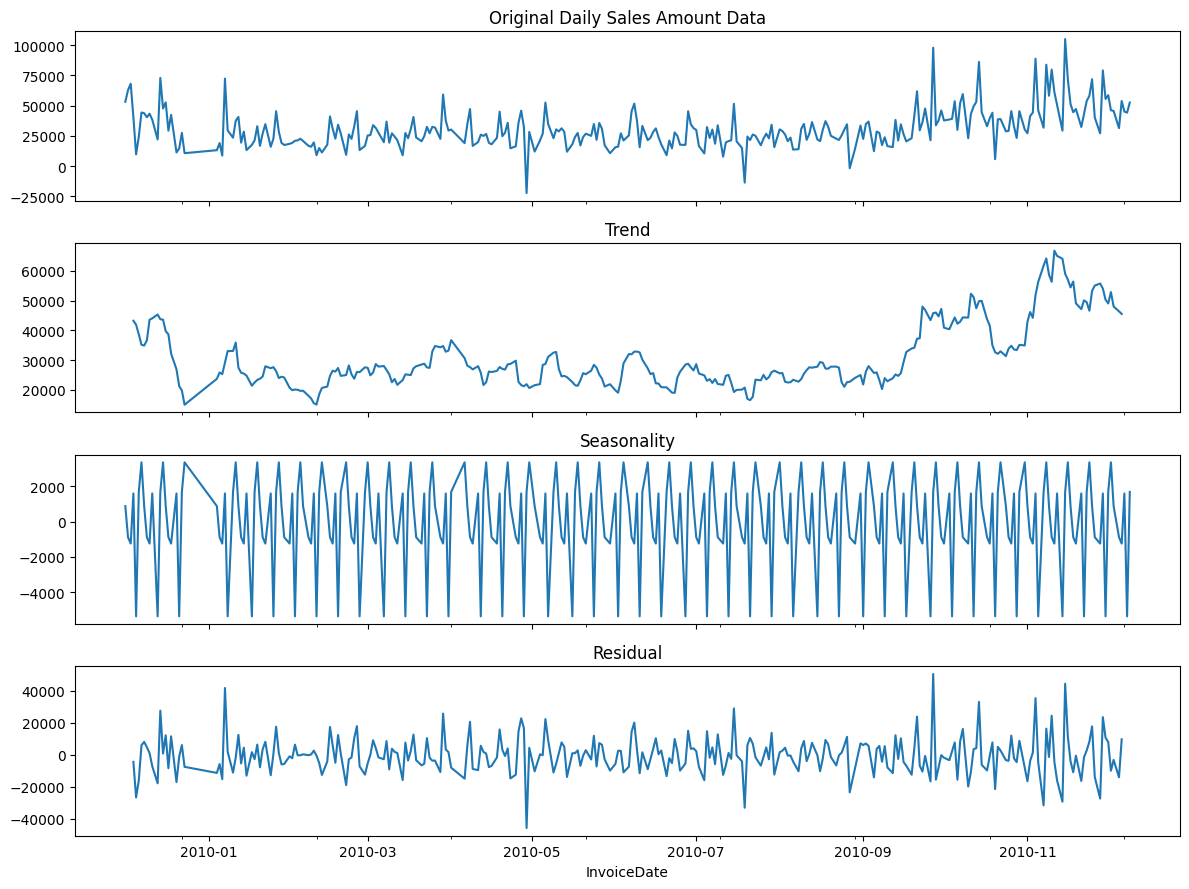

In [19]:
# Decompose sales amount data into trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_sales_amount = seasonal_decompose(daily_purchase_trend['SalesAmount'], model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)
decomposed_sales_amount.observed.plot(ax=axes[0], title='Original Daily Sales Amount Data')
decomposed_sales_amount.trend.plot(ax=axes[1], title='Trend')
decomposed_sales_amount.seasonal.plot(ax=axes[2], title='Seasonality')
decomposed_sales_amount.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

* In the trend graph, an upward pattern appears toward the later stages. This indicates a long-term increase in sales amount.
* In the seasonality graph, a repeating pattern is observed with a period of 7. This suggests a weekly cycle.

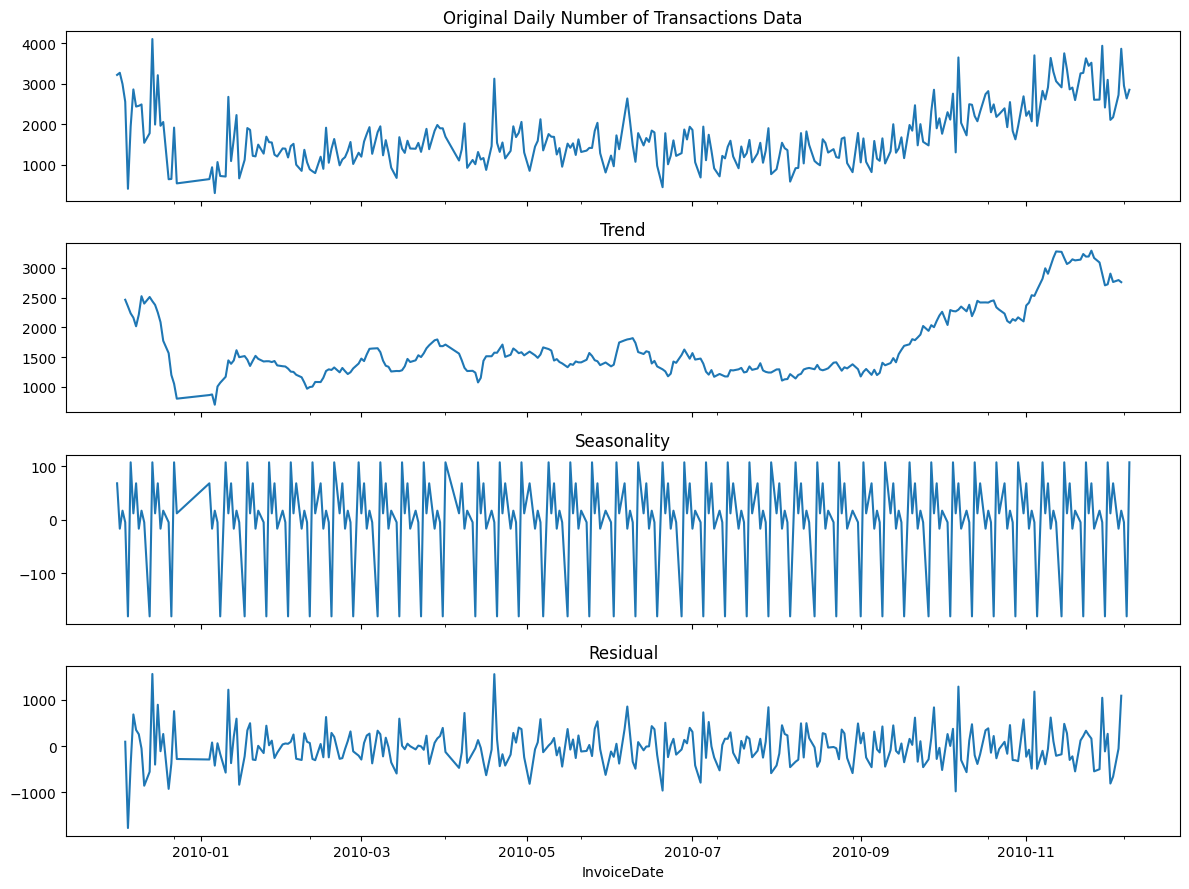

In [20]:
decomposed_transactions = seasonal_decompose(daily_purchase_trend['Transactions'], model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)
decomposed_transactions.observed.plot(ax=axes[0], title='Original Daily Number of Transactions Data')
decomposed_transactions.trend.plot(ax=axes[1], title='Trend')
decomposed_transactions.seasonal.plot(ax=axes[2], title='Seasonality')
decomposed_transactions.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

* Like the previous graph, the number of transactions also shows a long-term increasing trend. The increase in both sales amount and transaction amount suggests business growth.
* Seasonality also shows a recurring 7-day pattern. It is likely that both sales amount and transaction count increased on weekends, but this needs to be verified.

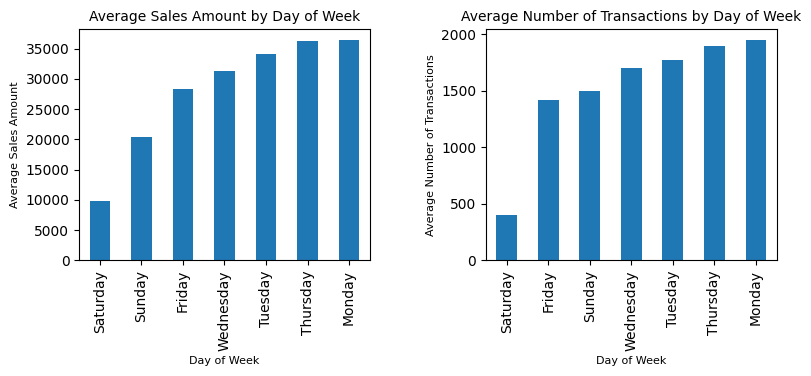

In [21]:
daily_purchase_trend['DayOfWeek'] = pd.to_datetime(daily_purchase_trend.index).day_name()

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

daily_purchase_trend.groupby('DayOfWeek')['SalesAmount'].mean().sort_values().plot(ax=axes[0], kind='bar')
axes[0].set_title("Average Sales Amount by Day of Week", fontsize=10)
axes[0].set_xlabel("Day of Week", fontsize=8)
axes[0].set_ylabel("Average Sales Amount", fontsize=8)

daily_purchase_trend.groupby('DayOfWeek')['Transactions'].mean().sort_values().plot(ax=axes[1], kind='bar')
axes[1].set_title("Average Number of Transactions by Day of Week", fontsize=10)
axes[1].set_xlabel("Day of Week", fontsize=8)
axes[1].set_ylabel("Average Number of Transactions", fontsize=8)

plt.subplots_adjust(wspace=0.4)
plt.show()

Contrary to expectations, both sales amount and transaction count are lowest on Saturday (weekend) and highest on Monday (weekday).
* A quick look at the data shows that some customers make large purchases at once, suggesting that this business likely has many B2B customers. As a result, purchases may be more active on weekdays.

##### Purchase Volume by Country

In [22]:
country_purchase_trend = purchase_trend_df.groupby('Country').agg({'Quantity': 'sum', 'Price': 'mean', 'SalesAmount': 'sum', 'Invoice': 'count'})
country_purchase_trend = country_purchase_trend.sort_values(by='SalesAmount', ascending=False)
country_purchase_trend = country_purchase_trend.rename(columns={'Invoice': 'Transactions'})
country_purchase_trend

,Quantity,Price,SalesAmount,Transactions
Country,,,,
United Kingdom,4491080,4.571017,8194777.533,482924
EIRE,188704,7.948114,352242.730,9670
Netherlands,181823,3.311910,263863.410,2769
Germany,107133,3.677999,196290.351,8129
France,74471,4.189418,130769.900,5772
Sweden,52238,7.653093,51213.510,902
Denmark,227030,2.642383,46972.950,428
Switzerland,22053,4.411281,43343.410,1187
Spain,18332,6.186244,37084.900,1278


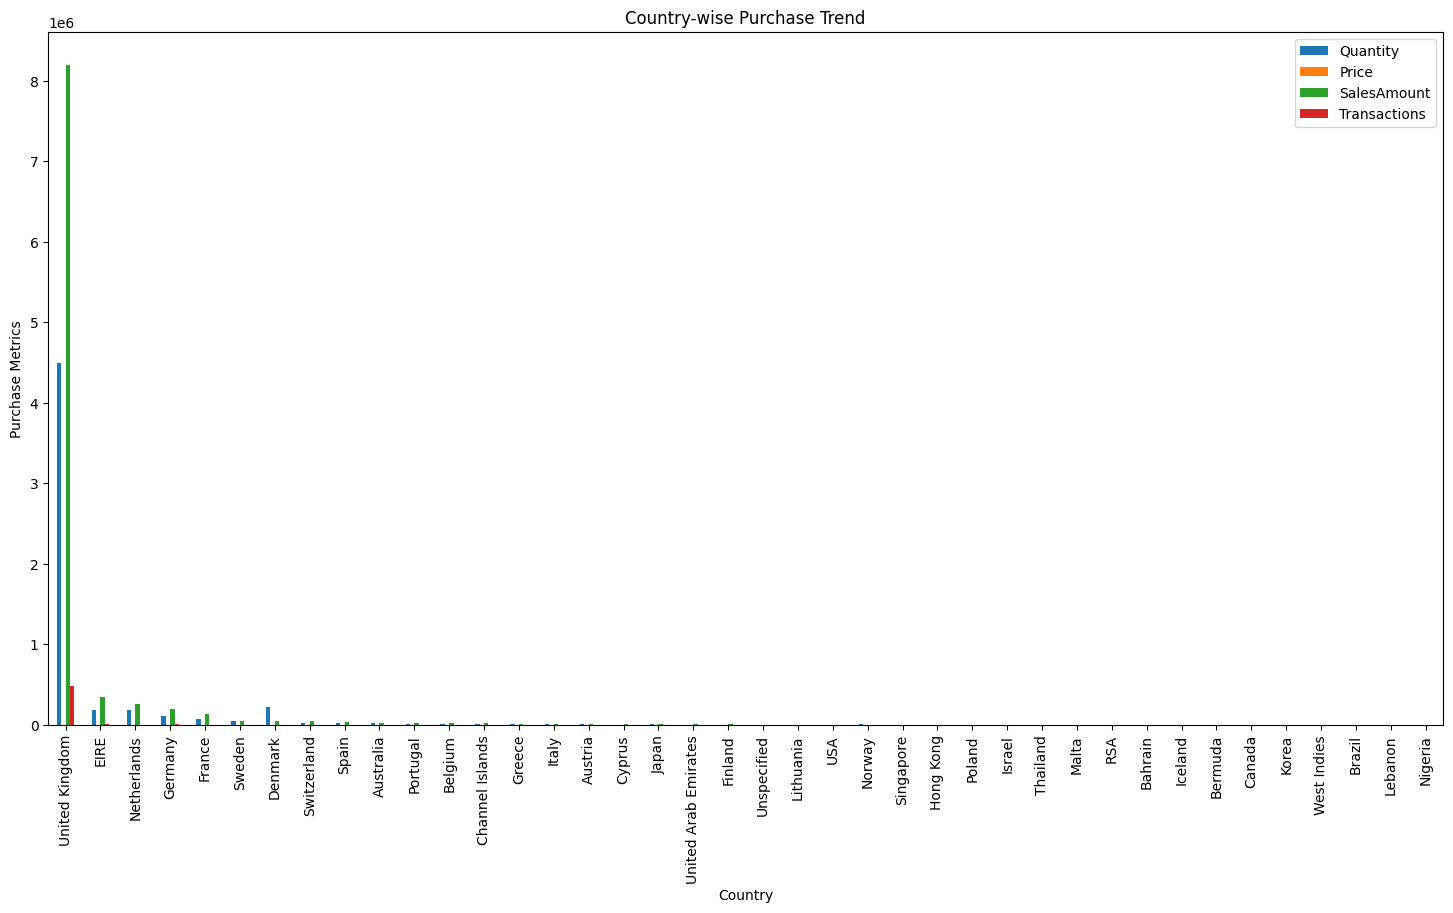

In [23]:
ax = country_purchase_trend.plot(kind='bar', figsize=(18, 9))
ax.set_title("Country-wise Purchase Trend")
ax.set_xlabel("Country")
ax.set_ylabel("Purchase Metrics")
plt.show()

* This graph is difficult to analyze

In [24]:
country_product_quantity = purchase_trend_df.groupby(['Country', 'Description'])['Quantity'].sum().unstack().fillna(0)
country_product_quantity

Description,21494,22467,22719,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,...,wet & rotting,wet and rotting,wet cartons,wet ctn,wet damages,wet/smashed/unsellable,wonky bottom/broken,wrong code,wrong ctn size,wrong invc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bahrain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Channel Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


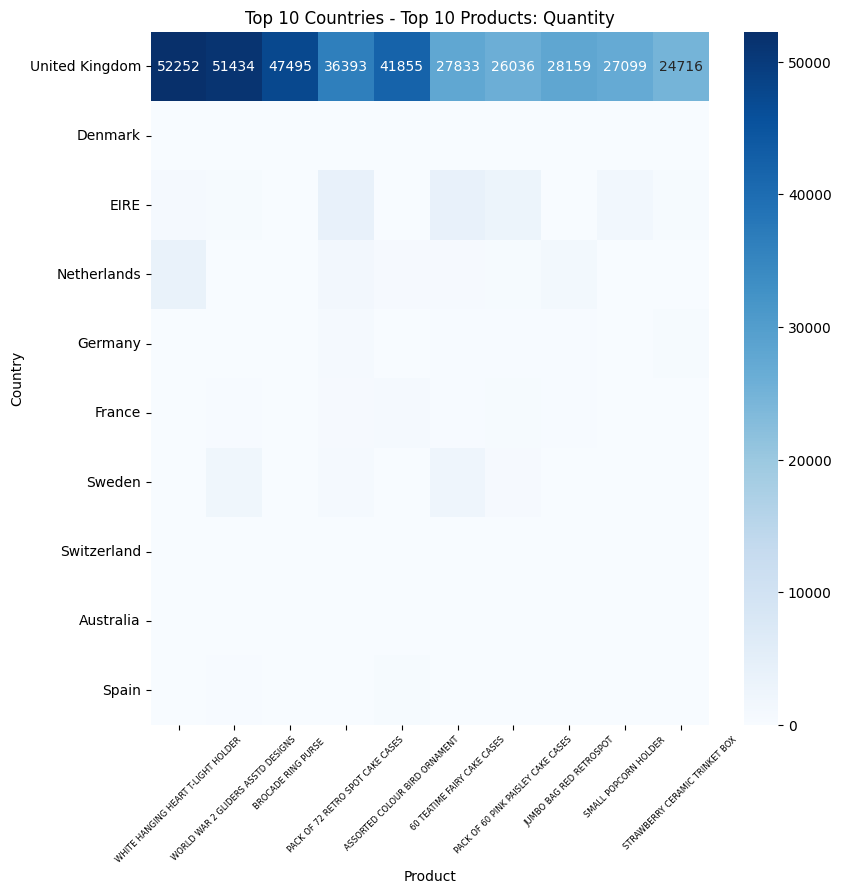

In [25]:
# Create a heatmap displaying only the top 10 countries and the top 10 products based on purchase volume.

top_products = country_product_quantity.sum().nlargest(10).index
top_countries = country_product_quantity.sum(axis=1).nlargest(10).index
filtered_data = country_product_quantity.loc[top_countries, top_products]

plt.figure(figsize=(9, 9))

import seaborn as sns
sns.heatmap(filtered_data, cmap="Blues", annot=True, fmt=".0f")

plt.title("Top 10 Countries - Top 10 Products: Quantity")
plt.xlabel("Product")
plt.ylabel("Country")
plt.xticks(rotation=45, fontsize=6)
plt.show()

* The United Kingdom has an overwhelmingly high purchase volume. This suggests that the online retail purchase service primarily targets the United Kingdom.

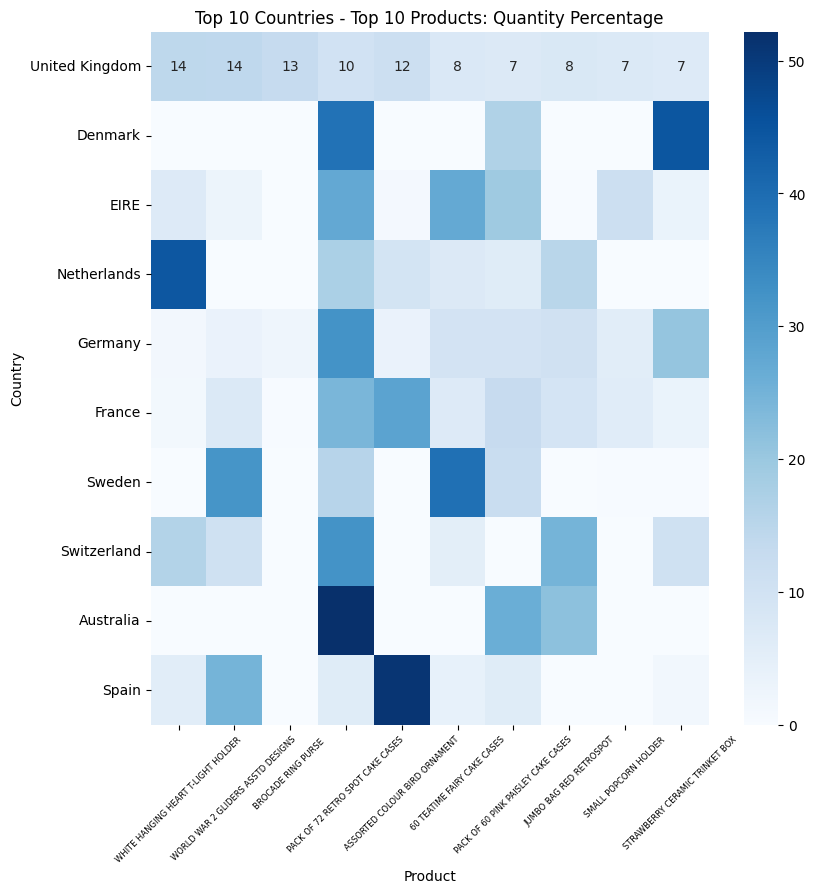

In [26]:
# Since the previous graph did not reveal the top purchased products in other countries,
# Create another heatmap showing the proportion of product quantity by country.

filtered_data_percentage = filtered_data.div(filtered_data.sum(axis=1), axis=0)*100

plt.figure(figsize=(9, 9))

sns.heatmap(filtered_data_percentage, cmap="Blues", annot=True, fmt=".0f")

plt.title("Top 10 Countries - Top 10 Products: Quantity Percentage")
plt.xlabel("Product")
plt.ylabel("Country")
plt.xticks(rotation=45, fontsize=6)
plt.show()

* The United Kingdom, identified as the largest market, does not concentrate purchases on specific products.
* In contrast, other countries show distinct purchasing patterns. For example, Australia primarily purchases the fourth product, pack of 72 retro spot cake cases, while buying very few other products. For such countries, targeted promotions on their preferred products could potentially increase sales.

### Case Study: United Kingdom's purchase trend analysis

To gain deeper insights,
**Further analyze the United Kingdom market, the largest one which exhibits a purchasing pattern of buying a wide range of items evenly.**

In [27]:
purchase_trend_UK = purchase_trend_df[purchase_trend_df['Country']=="United Kingdom"]
purchase_trend_UK = purchase_trend_UK.drop(columns='Country')
purchase_trend_UK

,Customer ID,Invoice,Description,Quantity,Price,InvoiceDate,InvoiceTime,SalesAmount
0,13085,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-12-01,07:45:00,83.40
1,13085,489434,PINK CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00
2,13085,489434,WHITE CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00
3,13085,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-12-01,07:45:00,100.80
4,13085,489434,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-12-01,07:45:00,30.00
...,...,...,...,...,...,...,...,...
525456,17530,538171,FELTCRAFT DOLL ROSIE,2,2.95,2010-12-09,20:01:00,5.90
525457,17530,538171,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,2010-12-09,20:01:00,3.75
525458,17530,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,2010-12-09,20:01:00,3.75
525459,17530,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,2010-12-09,20:01:00,7.50


Since more than 4/5 of the data comes from the UK, it is reasonable to analyze the UK data alone. While UK buyers may not fully represent global customers, focusing on a single country avoids potential distortions caused by unique characteristics of other countries.

##### Daily purchase trend of UK

In [28]:
daily_purchase_trend_UK = purchase_trend_UK.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Price': 'mean', 'SalesAmount': 'sum', 'Invoice': 'count'})
daily_purchase_trend_UK = daily_purchase_trend_UK.rename(columns={'Invoice': 'Transactions'})
daily_purchase_trend_UK

,Quantity,Price,SalesAmount,Transactions
InvoiceDate,,,,
2009-12-01,20600,4.502075,46692.71,2950
2009-12-02,26638,4.115459,55871.42,3213
2009-12-03,44230,4.457975,67340.80,2903
2009-12-04,19768,3.756896,37828.33,2439
2009-12-05,4722,3.432826,9042.36,368
...,...,...,...,...
2010-12-05,13604,2.850409,25462.20,2493
2010-12-06,20648,4.557088,52402.84,3809
2010-12-07,24035,29.785597,42301.48,2846


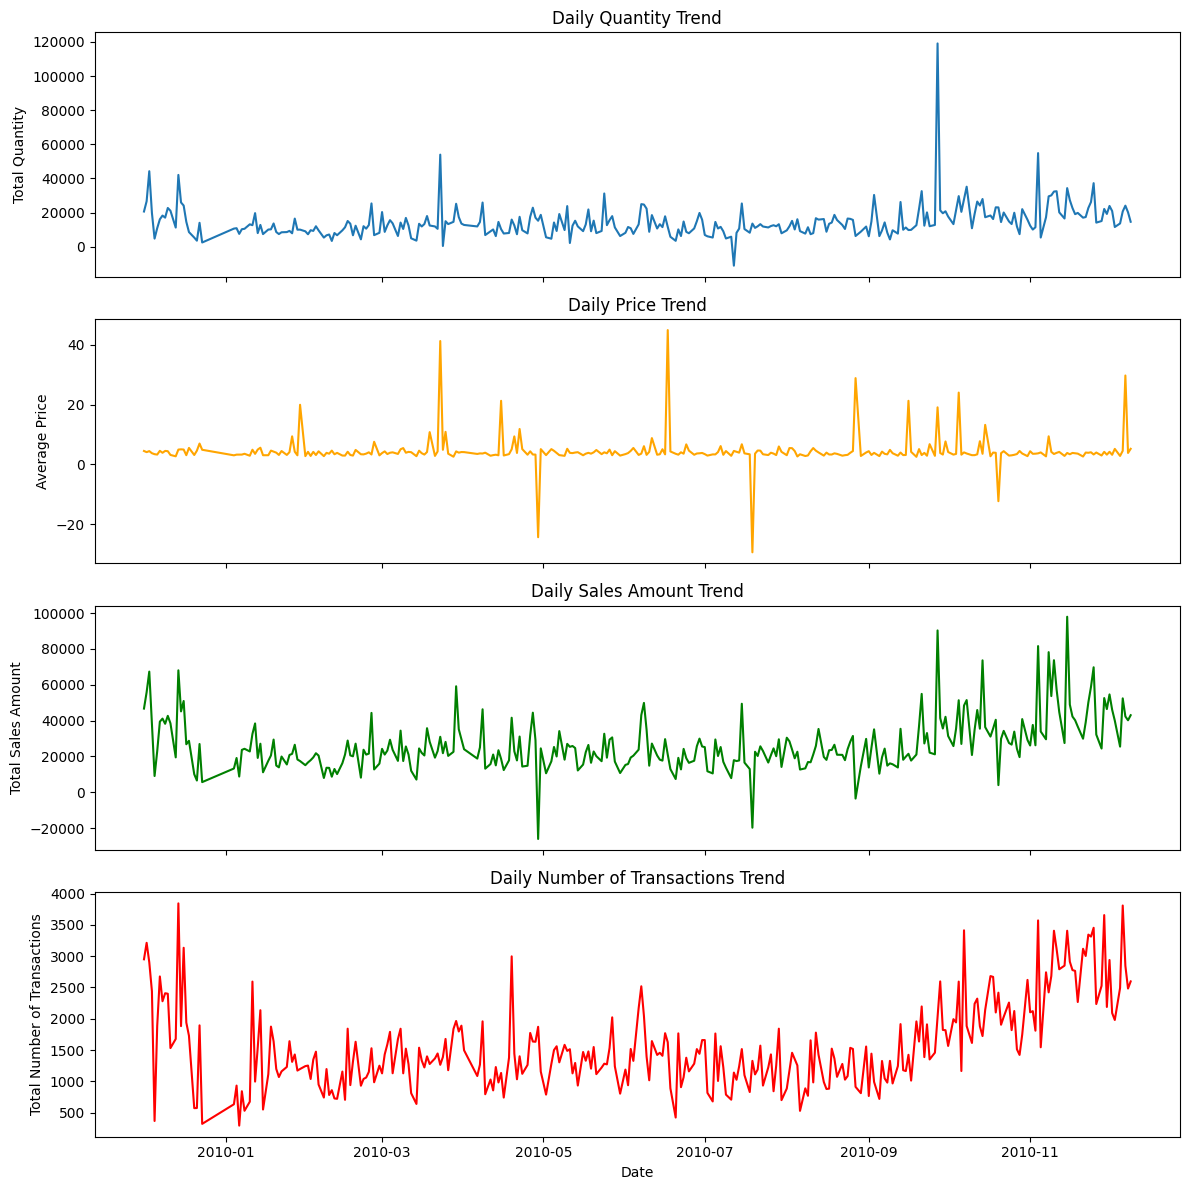

In [29]:
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

axes[0].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['Quantity'])
axes[0].set_ylabel('Total Quantity')
axes[0].set_title('Daily Quantity Trend')

axes[1].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['Price'], color='orange')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Daily Price Trend')

axes[2].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['SalesAmount'], color='green')
axes[2].set_ylabel('Total Sales Amount')
axes[2].set_title('Daily Sales Amount Trend')

axes[3].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['Transactions'], color='red')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Total Number of Transactions')
axes[3].set_title('Daily Number of Transactions Trend')

plt.tight_layout()
plt.show()

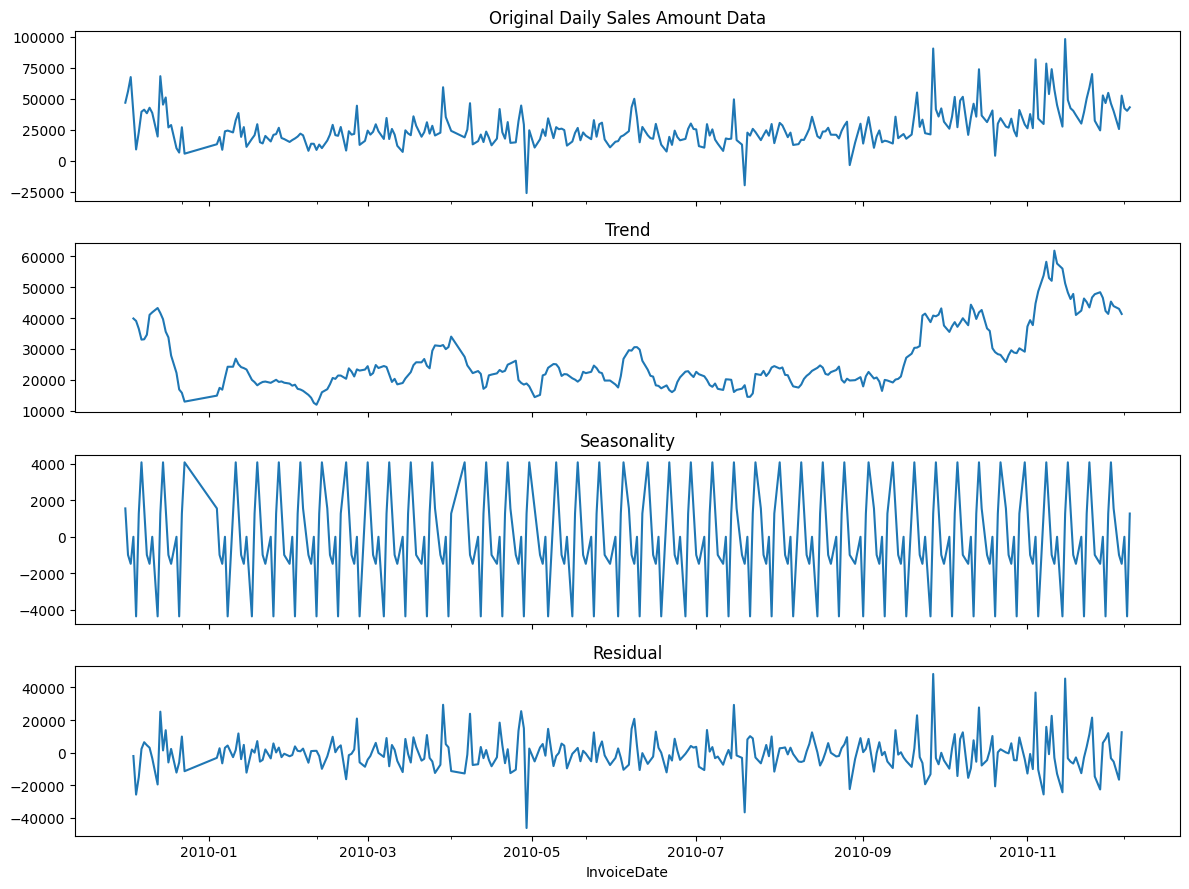

In [30]:
decomposed_sales_amount_UK = seasonal_decompose(daily_purchase_trend_UK['SalesAmount'], model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)
decomposed_sales_amount_UK.observed.plot(ax=axes[0], title='Original Daily Sales Amount Data')
decomposed_sales_amount_UK.trend.plot(ax=axes[1], title='Trend')
decomposed_sales_amount_UK.seasonal.plot(ax=axes[2], title='Seasonality')
decomposed_sales_amount_UK.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

* The graph shows a pattern similar to the one observed in the overall data. This suggests that the analyses conducted on the entire dataset can also be applied to the UK market.

##### Compare customer with and without membership

In [31]:
retail_UK = purchase_trend_UK.copy()
retail_UK['Membership'] = retail_UK['Customer ID'].apply(lambda x: 'Non-Member' if x==-1 else 'Member')
retail_UK = retail_UK.drop(columns='Customer ID')
retail_UK

,Invoice,Description,Quantity,Price,InvoiceDate,InvoiceTime,SalesAmount,Membership
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-12-01,07:45:00,83.40,Member
1,489434,PINK CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00,Member
2,489434,WHITE CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00,Member
3,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-12-01,07:45:00,100.80,Member
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-12-01,07:45:00,30.00,Member
...,...,...,...,...,...,...,...,...
525456,538171,FELTCRAFT DOLL ROSIE,2,2.95,2010-12-09,20:01:00,5.90,Member
525457,538171,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,2010-12-09,20:01:00,3.75,Member
525458,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,2010-12-09,20:01:00,3.75,Member
525459,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,2010-12-09,20:01:00,7.50,Member


In [32]:
retail_UK['Membership'].value_counts()

Membership
Member        379423
Non-Member    103501
Name: count, dtype: int64

* Members outnumber Non-members by approximately 3.67 times.
    * The proportion of members in the overall data is overwhelmingly high, suggesting a member-centric business model.
    * If non-members are new customers, it is necessary to consider strategies for converting them into members.

In [33]:
membership_summary = retail_UK.groupby('Membership').agg({'Quantity': 'mean', 'Price': 'mean', 'SalesAmount': 'mean'})
membership_summary

,Quantity,Price,SalesAmount
Membership,,,
Member,11.451517,3.653249,18.550667
Non-Member,1.411687,7.935452,11.171176


* The average purchase quantity for Members is more than eight times higher than that of Non-members.  -> Members tend to make bulk purchases, suggesting a high likelihood of being business customers.
* Non-members have a significantly higher average unit price.  -> Non-members tend to purchase higher-priced products.

------
**A strategic approach would be to offer bulk purchase promotions to Members and recommendation system for premium products to Non-members.**

##### Create RFM feature 
- **R** recency: the customers recent purchase date ~ present
- **F** frequency: the customers purchasing frequency 
- **M** monetary: the customers order $ amount in total
- others features can be appended for more effective customer analysis (e.g. coupon usage, puchasing item spectrum, etc.)

In [34]:
retail_rfm = purchase_trend_UK.copy()
rfm = retail_rfm.groupby('Customer ID').agg({'InvoiceDate': 'max', 'Invoice': 'count', 'SalesAmount': 'sum'})
rfm = rfm.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'SalesAmount': 'Monetary'})
rfm

,Recency,Frequency,Monetary
Customer ID,,,
-1,2010-12-09,103501,1156227.90
12346,2010-10-04,46,-64.68
12608,2010-10-31,16,415.79
12745,2010-08-10,22,723.85
12746,2010-06-30,20,230.85
...,...,...,...
18283,2010-11-22,230,641.77
18284,2010-10-06,29,436.68
18285,2010-02-17,12,427.00


Since the dataset includes both purchase and refund data, a simple RFM analysis may lead to errors, such as incorrectly identifying customers who made many purchases but also refunded most of them as high-value customers. To address this issue, the analysis will be conducted as follows:
- **R** Recency: Since the goal is to track how recently a customer has used the service, the most recent transaction will be considered regardless of whether it is a purchase or a refund.
- **F** Frequency: To measure how often a customer makes purchases through the service, the frequency of refunds will be subtracted from the frequency of purchases.
- **M** Monetary: To assess how much a customer has spent through the service, the total refund amount will be subtracted from the total purchase amount.

Additionally, if a customer who made many purchases and many refunds has the same net value as a customer who made fewer purchases and refunds, it would be difficult to distinguish between them. Therefore, refund ratio of the frequency and monetary will be separately calculated and added to the table for better differentation.

In [35]:
# filtering purchase data
rfm_purchase = retail_rfm[retail_rfm['Quantity']>=0].groupby('Customer ID').agg({'InvoiceDate': 'max', 'Invoice': 'count', 'SalesAmount': 'sum'})
rfm_purchase = rfm_purchase.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'SalesAmount': 'Monetary'})
rfm_purchase

,Recency,Frequency,Monetary
Customer ID,,,
-1,2010-12-09,102886,1294821.28
12346,2010-06-28,33,372.86
12608,2010-10-31,16,415.79
12745,2010-08-10,22,723.85
12746,2010-06-17,17,254.55
...,...,...,...
18283,2010-11-22,230,641.77
18284,2010-10-04,28,461.68
18285,2010-02-17,12,427.00


In [36]:
# filtering refund data
rfm_refunds = retail_rfm[retail_rfm['Quantity']<0].groupby('Customer ID').agg({'InvoiceDate': 'max', 'Invoice': 'count', 'SalesAmount': 'sum'})
rfm_refunds = rfm_refunds.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'SalesAmount': 'Monetary'})
rfm_refunds

,Recency,Frequency,Monetary
Customer ID,,,
-1,2010-12-09,615,-138593.38
12346,2010-10-04,13,-437.54
12746,2010-06-30,3,-23.70
12747,2010-11-24,8,-111.95
12748,2010-12-05,31,-1981.63
...,...,...,...
18277,2010-11-16,3,-55.92
18280,2010-11-24,2,-15.70
18284,2010-10-06,1,-25.00


In [37]:
# merge purchase data and refund data
rfm = rfm_purchase.merge(rfm_refunds, on='Customer ID', how='left').fillna(0)
rfm

,Recency_x,Frequency_x,Monetary_x,Recency_y,Frequency_y,Monetary_y
Customer ID,,,,,,
-1,2010-12-09,102886,1294821.28,2010-12-09,615.0,-138593.38
12346,2010-06-28,33,372.86,2010-10-04,13.0,-437.54
12608,2010-10-31,16,415.79,0,0.0,0.00
12745,2010-08-10,22,723.85,0,0.0,0.00
12746,2010-06-17,17,254.55,2010-06-30,3.0,-23.70
...,...,...,...,...,...,...
18283,2010-11-22,230,641.77,0,0.0,0.00
18284,2010-10-04,28,461.68,2010-10-06,1.0,-25.00
18285,2010-02-17,12,427.00,0,0.0,0.00


In [38]:
rfm['Net Frequency'] = rfm['Frequency_x'] - rfm['Frequency_y']
rfm['Net Monetary'] = rfm['Monetary_x'] - rfm['Monetary_y']
rfm['Refund Frequency'] = round(rfm['Frequency_y'] / (rfm['Frequency_x'] + rfm['Frequency_y'] * 100), 2)
rfm['Refund Monetary'] = round(abs(rfm['Monetary_y']) / (rfm['Monetary_x'] + abs(rfm['Monetary_y'])) * 100, 2)

rfm = rfm.rename(columns={'Recency_x': 'Recency'})
rfm = rfm.drop(columns=['Frequency_x', 'Frequency_y', 'Monetary_x', 'Monetary_y', 'Recency_y'])

rfm

,Recency,Net Frequency,Net Monetary,Refund Frequency,Refund Monetary
Customer ID,,,,,
-1,2010-12-09,102271.0,1433414.66,0.00,9.67
12346,2010-06-28,20.0,810.40,0.01,53.99
12608,2010-10-31,16.0,415.79,0.00,0.00
12745,2010-08-10,22.0,723.85,0.00,0.00
12746,2010-06-17,14.0,278.25,0.01,8.52
...,...,...,...,...,...
18283,2010-11-22,230.0,641.77,0.00,0.00
18284,2010-10-04,27.0,486.68,0.01,5.14
18285,2010-02-17,12.0,427.00,0.00,0.00


In [39]:
max(purchase_trend_UK['InvoiceDate']) # take this into account when deciding the present date

datetime.date(2010, 12, 9)

Since the most recent date in the dataset is December 9, 2010, I will assume that the current date is January 1, 2011, and convert Recency values into a per-day basis for analysis.

In [40]:
rfm['Recency'] = pd.to_datetime(rfm['Recency']) - dt.datetime(2011, 1, 1)
rfm['Recency'] = rfm['Recency'].dt.days
rfm

,Recency,Net Frequency,Net Monetary,Refund Frequency,Refund Monetary
Customer ID,,,,,
-1,-23,102271.0,1433414.66,0.00,9.67
12346,-187,20.0,810.40,0.01,53.99
12608,-62,16.0,415.79,0.00,0.00
12745,-144,22.0,723.85,0.00,0.00
12746,-198,14.0,278.25,0.01,8.52
...,...,...,...,...,...
18283,-40,230.0,641.77,0.00,0.00
18284,-89,27.0,486.68,0.01,5.14
18285,-318,12.0,427.00,0.00,0.00


In [41]:
rfm.isnull().sum()

Recency             0
Net Frequency       0
Net Monetary        0
Refund Frequency    0
Refund Monetary     2
dtype: int64

In [42]:
rfm[rfm['Refund Monetary'].isnull()]

,Recency,Net Frequency,Net Monetary,Refund Frequency,Refund Monetary
Customer ID,,,,,
14103,-323,1.0,0.0,0.0,NaN
14827,-323,1.0,0.0,0.0,NaN


If Refund Frequency is 0, it indicates that there were no refunds. In this case, Refund Monetary should also be recorded as 0 to maintain consistency in the data.

In [43]:
rfm = rfm.fillna(0)

##### Clustering

The RFM table will be used to categorize customers into different segments.

First, an **automated clustering approach** will be applied base on the table's contents. The RFM values will be scaled to a range of 0 to 1, and K-Means Clustering will be used to divide customers into two or more groups.

In [44]:
from sklearn.preprocessing import MinMaxScaler

mns = MinMaxScaler()
rfm_scaled = mns.fit_transform(rfm)
rfm_scaled = pd.DataFrame(data=rfm_scaled, columns=rfm.columns)
rfm_scaled

,Recency,Net Frequency,Net Monetary,Refund Frequency,Refund Monetary
0,1.000000,1.000000,1.000000,0.0,0.128539
1,0.560322,0.000684,0.000565,1.0,0.717666
2,0.895442,0.000645,0.000290,0.0,0.000000
3,0.675603,0.000704,0.000505,0.0,0.000000
4,0.530831,0.000625,0.000194,1.0,0.113253
...,...,...,...,...,...
3967,0.954424,0.002736,0.000448,0.0,0.000000
3968,0.823056,0.000753,0.000340,1.0,0.068324
3969,0.209115,0.000606,0.000298,0.0,0.000000
3970,0.702413,0.001114,0.000980,1.0,0.102220


Although refund tendencies are also an important factor in customer segmentation, traditional RFM analysis focuses on segmenting customers based on purchase patterns. Therefore, the first clustering will be performed using only Recency, Net Frequency, and Net Monetary. Then, a second clustering will be conducted including Refund Frequency and Refund Monetary to compare the results and evaluate the impact of refund-related features.

In [45]:
# find optimal number of clusters: elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_optimal_clusters(x):
    inertia = []
    silhouette_scores = []
    k_range = range(2, 10) 
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(x)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(x, kmeans.labels_))
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o', color='r')
    plt.xlabel('Numeber of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    
    plt.show()    

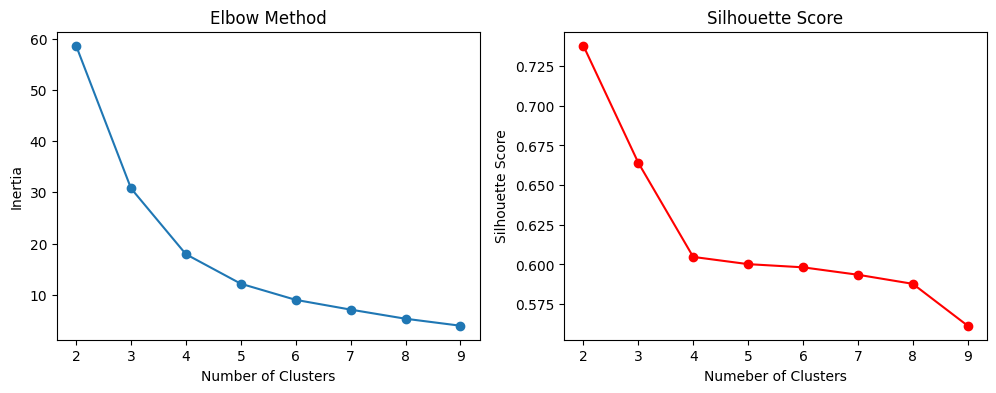

In [46]:
# without refund
columns_without_refund = ['Recency', 'Net Frequency', 'Net Monetary']
rfm_scaled_without_refund = mns.fit_transform(rfm[columns_without_refund])

find_optimal_clusters(rfm_scaled_without_refund)

The optimal number of clusters appears to be 4.

In [47]:
k = 4
kmeans_without_refund = KMeans(n_clusters=k, random_state=42, n_init=10).fit(rfm_scaled_without_refund)
rfm_scaled_without_refund = pd.DataFrame(rfm_scaled_without_refund, columns=columns_without_refund) # the data will be returned in an array format after scaling
rfm_scaled_without_refund['Cluster'] = kmeans_without_refund.labels_
rfm_scaled_without_refund

,Recency,Net Frequency,Net Monetary,Cluster
0,1.000000,1.000000,1.000000,3
1,0.560322,0.000684,0.000565,2
2,0.895442,0.000645,0.000290,3
3,0.675603,0.000704,0.000505,1
4,0.530831,0.000625,0.000194,2
...,...,...,...,...
3967,0.954424,0.002736,0.000448,3
3968,0.823056,0.000753,0.000340,1
3969,0.209115,0.000606,0.000298,0
3970,0.702413,0.001114,0.000980,1


Since dimensions higher than 3 cannot be visualized on a plane, the data will be reduced to 2 dimensions for visualization.

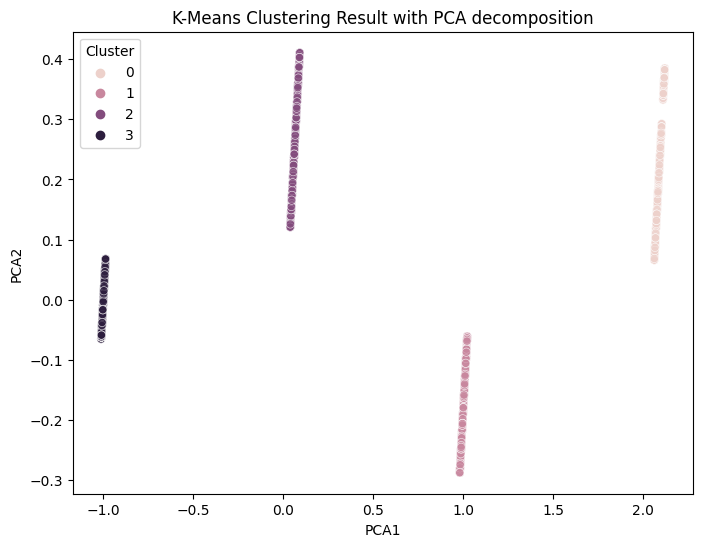

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca_without_refund = pca.fit_transform(rfm_scaled_without_refund)

rfm_pca_without_refund = pd.DataFrame(rfm_pca_without_refund, columns=['PCA1', 'PCA2'])
rfm_pca_without_refund['Cluster'] = kmeans_without_refund.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm_pca_without_refund, alpha=0.75)
plt.title("K-Means Clustering Result with PCA decomposition")
plt.show()

In [49]:
cluster_summary_without_refund = rfm_scaled_without_refund.groupby('Cluster').mean()
cluster_summary_without_refund

,Recency,Net Frequency,Net Monetary
Cluster,,,
0,0.177296,0.000712,0.000360
1,0.784803,0.001096,0.000882
2,0.485706,0.000839,0.000500
3,0.947918,0.002350,0.002591


### 🧩 Cluster Interpretation Table (Recency, Frequency, Monetary)

| Cluster | Recency (Recent Purchase) | Net Frequency (Purchase Frequency) | Net Monetary (Spending Amount) | Interpretation |
|--------|----------------------------|------------------------------------|---------------------------------|----------------|
| 0 | Very low (0.18) → Long time since last purchase | Very low (0.00071) | Very low (0.00036) | 💤 **Inactive low spender**: Rare, small purchases and low recent activity |
| 1 | Medium-high (0.78) | Medium (0.00110) | Low-medium (0.00088) | 📦 **Moderate customer**: Buys occasionally with moderate spend |
| 2 | Medium (0.49) | Low (0.00084) | Low (0.00050) | 🧊 **Dormant spender**: Infrequent low-value purchases with average recency |
| 3 | Very high (0.95) → Very recent purchase | Very high (0.00235) | Very high (0.00259) | 💎 **VIP customer**: Very recent, frequent, and high-spending behavior |

---

### 🔍 Summary
- **Cluster 0**: Rare, low-spending, inactive customer
- **Cluster 1**: Occasional buyer with moderate spending
- **Cluster 2**: Low-frequency, low-value, average recency customer
- **Cluster 3**: Ideal high-value customer with very recent and frequent purchases

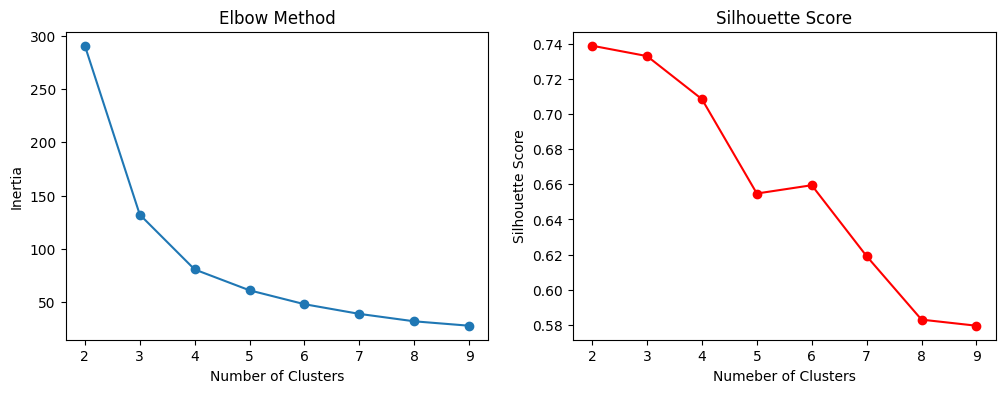

In [50]:
# with refund
rfm_scaled_with_refund = mns.fit_transform(rfm.fillna(0))

find_optimal_clusters(rfm_scaled_with_refund)

The optimal number of clusters appears to be 4.

In [51]:
k = 4
kmeans_with_refund = KMeans(n_clusters=k, random_state=42, n_init=10).fit(rfm_scaled_with_refund)
rfm_scaled_with_refund = pd.DataFrame(rfm_scaled_with_refund, columns=rfm.columns) # the data will be returned in an array format after scaling
rfm_scaled_with_refund['Cluster'] = kmeans_with_refund.labels_
rfm_scaled_with_refund

,Recency,Net Frequency,Net Monetary,Refund Frequency,Refund Monetary,Cluster
0,1.000000,1.000000,1.000000,0.0,0.128539,2
1,0.560322,0.000684,0.000565,1.0,0.717666,3
2,0.895442,0.000645,0.000290,0.0,0.000000,2
3,0.675603,0.000704,0.000505,0.0,0.000000,2
4,0.530831,0.000625,0.000194,1.0,0.113253,3
...,...,...,...,...,...,...
3967,0.954424,0.002736,0.000448,0.0,0.000000,2
3968,0.823056,0.000753,0.000340,1.0,0.068324,1
3969,0.209115,0.000606,0.000298,0.0,0.000000,0
3970,0.702413,0.001114,0.000980,1.0,0.102220,1


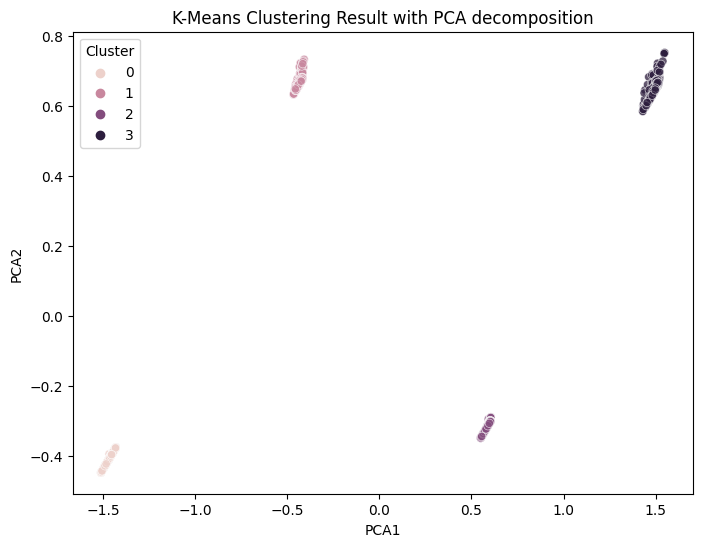

In [52]:
rfm_pca_with_refund = pca.fit_transform(rfm_scaled_with_refund)

rfm_pca_with_refund = pd.DataFrame(rfm_pca_with_refund, columns=['PCA1', 'PCA2'])
rfm_pca_with_refund['Cluster'] = kmeans_with_refund.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm_pca_with_refund, alpha=0.75)
plt.title("K-Means Clustering Result with PCA decomposition")
plt.show()

In [53]:
cluster_summary_with_refund = rfm_scaled_with_refund.groupby('Cluster').mean()
cluster_summary_with_refund

,Recency,Net Frequency,Net Monetary,Refund Frequency,Refund Monetary
Cluster,,,,,
0,0.325906,0.000752,0.000289,0.0,0.000397
1,0.904179,0.001856,0.002906,1.0,0.062069
2,0.879627,0.001932,0.001452,0.0,0.002287
3,0.417302,0.000863,0.000918,1.0,0.175237


### 🧩 Cluster Interpretation Table

| Cluster | Recency (Recent Purchase) | Net Frequency (Purchase Frequency) | Net Monetary (Spending Amount) | Refund Frequency | Refund Monetary | Interpretation |
|--------|----------------------------|------------------------------------|---------------------------------|------------------|------------------|----------------|
| 0 | Medium recent (0.33) | Very low (0.00075) | Very low (0.00029) | No refunds (0.0) | Very low (0.00040) | 🎯 **Low-value inactive customer**: Infrequent, low-value purchases with no refunds |
| 1 | Most recent (0.90) | Very high (0.00186) | Highest (0.00291) | Has refunds (1.0) | Medium (0.06207) | 💎 **High-value active customer**: Frequent, high-spending, but some refunds |
| 2 | Recent (0.88) | Very high (0.00193) | High (0.00145) | No refunds (0.0) | Low (0.00229) | 💼 **Loyal and reliable customer**: Frequent spender with no refund history |
| 3 | Low recent activity (0.42) | Low (0.00086) | Low to medium (0.00092) | Has refunds (1.0) | Very high (0.17524) | ⚠️ **High refund risk customer**: Less recent activity, high refund amount |

---

### 🔍 Summary
- **Cluster 0**: Occasional low spender, quiet customer
- **Cluster 1**: High-value, active buyer with some refund history
- **Cluster 2**: Ideal loyal customer, high activity and no refunds
- **Cluster 3**: Potential churn risk due to high refunds and low recent activity

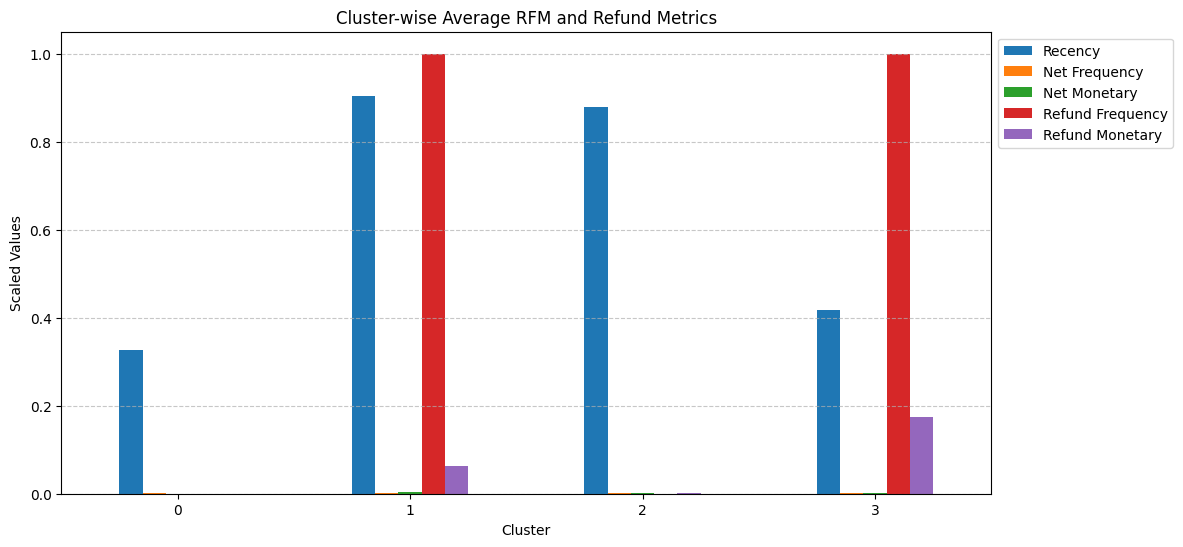

In [56]:
cluster_summary_with_refund.plot(kind="bar", figsize=(12, 6))
plt.title("Cluster-wise Average RFM and Refund Metrics")
plt.ylabel("Scaled Values")
plt.xticks(rotation=0)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

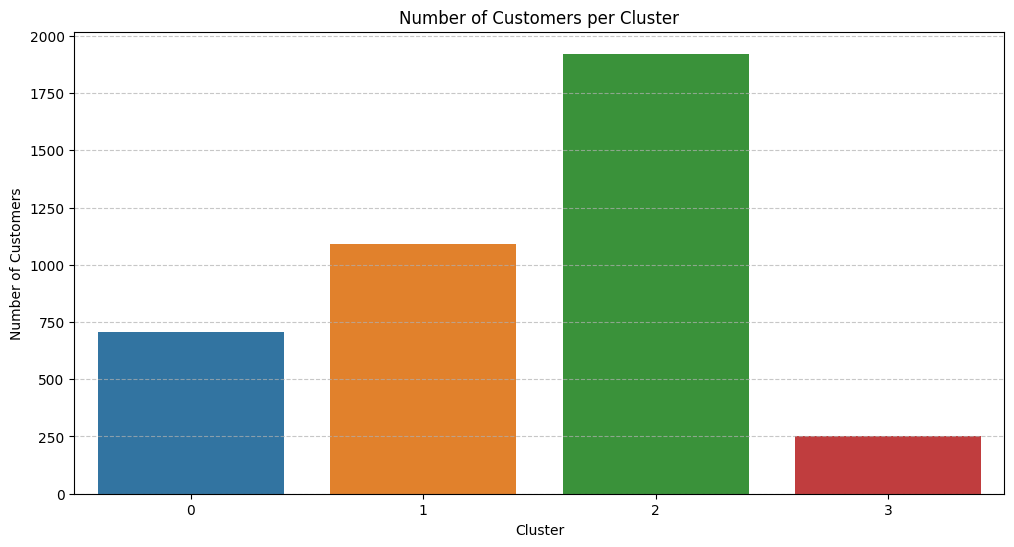

In [57]:
cluster_counts = rfm_scaled_with_refund["Cluster"].value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Count"]
cluster_counts = cluster_counts.sort_values(by="Cluster")

plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Count", data=cluster_counts)
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()